**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_).

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 138MB/s]


In [ ]:
!pip install --upgrade sqlmagic
!pip install --upgrade sqlalchemy
!pip install --upgrade ipython-sql
%load_ext sql

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 13.8 MB/s eta 0:00:00
  Created wheel for sqlmagic: filename=sqlmagic-0.0.3-py3-none-any.whl size=7956 sha256=745effcd78b9c2b14ccbc2cfa4384b4c3a7724c112ff526f35ea9c80f091416a
  Stored in directory: /root/.cache/pip/wheels/b2/53/09/bb841acbfc1bbd527d7549987ec329d14b07f04d6388d9856b
Successfully built sqlmagic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/knyazeva28lerochka28-dot/project1.git

fatal: destination path 'project1' already exists and is not an empty directory.


In [ ]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 50

%config SqlMagic.style = '_DEPRECATED_DEFAULT'


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
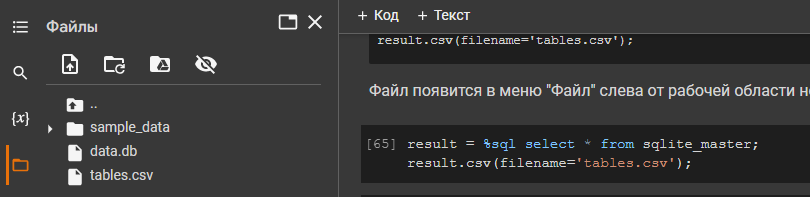

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [ ]:
%%sql
SELECT * FROM call
JOIN horoscope USING(agent_login)
JOIN task on call.wo_task_rk = task.task_rk
JOIN queue on call.wo_queue_id = queue.queue_id
JOIN product on call.wo_hit_rk = product.hit_rk
JOIN "action" on call.wo_hit_rk = "action".hit_rk
JOIN emp_x_org_gr on call.wo_employee_rk = emp_x_org_gr.employee_rk
JOIN "group" on "group".org_group_rk = emp_x_org_gr.org_group_rk
JOIN mngmnt on "group".org_management_rk = mngmnt.org_management_rk
JOIN result on "action".hit_status_result_id = result.hit_status_result_id;

 * sqlite:////content/data.db
Done.


wo_hit_rk,wo_task_rk,wo_queue_id,agent_login,wo_employee_rk,finish_dttm,duratoin_sec,horoscope,task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm_1,queue_id,queue_desc,hit_rk,hid,using_flg,hit_rk_1,hit_status_result_id,employee_rk,org_group_rk,org_group_rk_1,org_management_rk,group_nm,org_management_rk_1,management_nm,hit_status_result_id_1,hit_status_result_desc
73292106,93625442,12245,lyangama,66749466,2022-08-01 12:52:25,0,Козерог,93625442,1.0,GI,2022-08-01 00:46:37,2022-08-01 15:35:39,12245,Очередь 143,73292106,4,None,73292106,5,66749466,3244,3244,1621,Группа 30,1621,Управление КЦ Чизан,5,Недозвон
93763347,98572816,11696,enkoiion,88931008,2022-08-08 10:46:46,"12,53",Козерог,98572816,1.0,GI,2022-08-06 11:24:23,2022-08-17 11:23:53,11696,Очередь 4,93763347,3,None,93763347,2,88931008,2568,2568,1728,Группа 20,1728,Управление КЦ Мас,2,"Дозвон, Перезвонить"
13988704,91292760,14354,kinalapo,61041016,2022-08-16 14:16:03,0,Козерог,91292760,1.0,GI,2022-07-29 04:46:37,2022-09-22 10:57:30,14354,Очередь 58,13988704,4,None,13988704,5,61041016,2389,2389,323,Группа 5,323,Управление КЦ Ромашка,5,Недозвон
28495290,12470192,14303,kinasgsa,98181009,2022-08-22 18:38:13,0,Козерог,12470192,1.0,GI,2022-08-21 01:55:57,2022-08-30 12:59:05,14303,Очередь 79,28495290,4,None,28495290,5,98181009,2097,2097,687,Группа 19,687,Управление КЦ Верс,5,Недозвон
31412029,161228,9264,ikovnisu,47451124,2022-08-23 10:38:24,"128,47",Козерог,161228,1.0,GI,2022-08-08 01:01:35,2022-08-23 10:38:33,9264,Очередь 43,31412029,2,None,31412029,1,47451124,2105,2105,689,Группа 31,689,Управление КЦ Казан,1,"Дозвон, Отказ"
82299889,85191861,14644,atovksip,77811117,2022-08-04 10:53:26,0,Козерог,85191861,1.0,GI,2022-07-22 17:38:27,2022-08-12 14:57:49,14644,Очередь 119,82299889,4,None,82299889,5,77811117,2136,2136,696,Группа 48,696,Управление КЦ Неп,5,Недозвон
89329077,98650151,12245,oyankrsh,88658588,2022-08-06 13:32:42,0,Козерог,98650151,1.0,GI,2022-08-06 06:30:48,2022-08-09 15:49:22,12245,Очередь 143,89329077,4,None,89329077,5,88658588,3240,3240,1621,Группа 36,1621,Управление КЦ Чизан,5,Недозвон
19715922,9596828,14644,llinirra,59539859,2022-08-18 13:19:21,"71,99",Козерог,9596828,1.0,GI,2022-08-18 00:47:21,2022-08-18 13:19:26,14644,Очередь 119,19715922,4,None,19715922,1,59539859,2138,2138,1521,Группа 29,1521,Управление КЦ Дирим,1,"Дозвон, Отказ"
42214192,14854023,13044,novabbmu,11371111,2022-08-26 11:47:11,"208,12",Козерог,14854023,23.0,FW,2022-08-24 04:11:24,2022-08-26 11:47:11,13044,Очередь 111,42214192,4,None,42214192,1,11371111,960,960,402,Группа 15,402,Управление КЦ Шоколад,1,"Дозвон, Отказ"
51183929,18611189,13045,ievavamu,4241040,2022-08-30 16:45:57,0,Козерог,18611189,23.0,FW,2022-08-30 03:10:40,2022-08-31 10:05:40,13045,Очередь 29,51183929,4,None,51183929,5,4241040,58,58,325,Группа 42,325,Управление КЦ Супер,5,Недозвон


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [ ]:
%%sql
SELECT
    r.hit_status_result_desc,
    COUNT(*) AS "Кол-во"
FROM call c
JOIN action a ON c.wo_hit_rk = a.hit_rk
JOIN result r ON a.hit_status_result_id = r.hit_status_result_id
WHERE r.hit_status_result_desc = 'Дозвон, Успешно'
GROUP BY r.hit_status_result_desc;


 * sqlite:////content/data.db
Done.


hit_status_result_desc,Кол-во
"Дозвон, Успешно",3310


In [ ]:
%%sql
SELECT
    ROUND(
        SUM(CASE WHEN result.hit_status_result_desc = 'Дозвон, Успешно' THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN result.hit_status_result_desc IN ('Дозвон, Успешно', 'Дозвон, Отказ') THEN 1 ELSE 0 END), 0), 2) AS "Конверсия"
FROM call
    INNER JOIN action ON call.wo_hit_rk = action.hit_rk
    INNER JOIN result ON action.hit_status_result_id = result.hit_status_result_id;

 * sqlite:////content/data.db
Done.


Конверсия
15.21


In [ ]:
%%sql
SELECT ROUND(AVG(call.duratoin_sec), 2) "Ср. время"
FROM "call" INNER JOIN action on "call".wo_hit_rk = action.hit_rk
JOIN "result" USING (hit_status_result_id)
WHERE result.hit_status_result_desc = 'Дозвон, Успешно';

 * sqlite:////content/data.db
Done.


Ср. время
109.69
